In [1]:
#imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
# load data
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# check if passengerid unique
df_train.PassengerId.value_counts().sum(), df_test.PassengerId.value_counts().sum()

(891, 418)

In [6]:
df_train.set_index('PassengerId', inplace=True), df_test.set_index('PassengerId', inplace=True)

(None, None)

In [7]:
# join train and test
data = pd.concat((df_train, df_test), sort=False)

In [8]:
# check dtypes and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


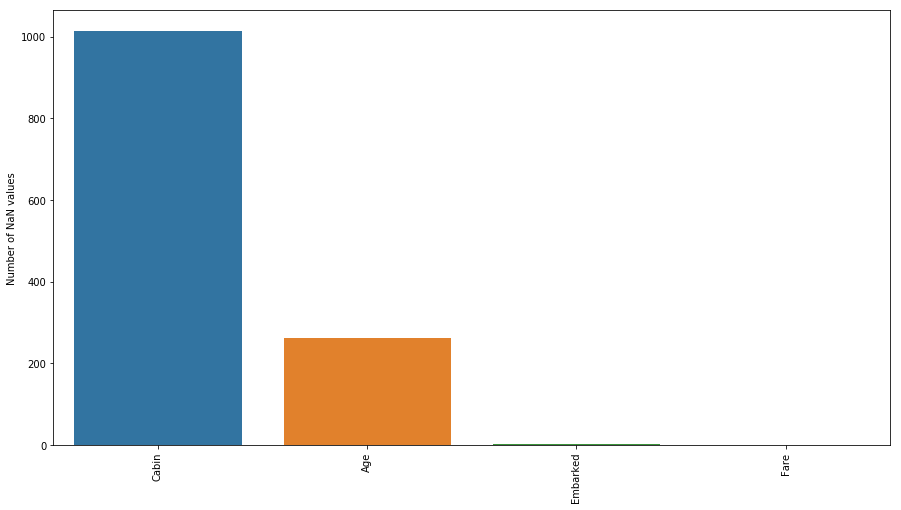

In [9]:
# check null values
null_totals = data.drop('Survived', axis=1).isnull().sum().sort_values(ascending=False)
null_totals = null_totals[null_totals != 0]
plt.figure(figsize=(15,8))
sns.barplot(null_totals.index, null_totals)
plt.xticks(rotation=90)
plt.gca().set_ylabel('Number of NaN values');

In [10]:
# relatively few missing values to fill, lets start with Fare
data[data.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [11]:
data.Fare.fillna(data.Fare.dropna().mode()[0], inplace=True)
data.Fare.isnull().sum()

0

In [12]:
data[data.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)
data.Embarked.isnull().sum()

0

In [14]:
data[data.Age.isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [15]:
# lets fill missing ages with the median grouped by sex and class
data.Age = data.groupby(['Pclass', 'Sex']).Age.apply(lambda x: x.fillna(x.median()))
data.Age.isnull().sum()

0

In [16]:
data.Cabin.isnull().sum()

1014

In [17]:
# lets create a feature for passengers with cabins then drop the cabins column
data['WithCabin'] = data.Cabin.apply(lambda x: 1 if type(x) == str else 0)
data.drop('Cabin', axis=1, inplace=True)

In [18]:
# it doesn't seem that ticket is a useful feature so we can drop it
data.drop('Ticket', axis=1, inplace=True)

In [19]:
# lets create a new column total family and drop sibsp and parch
data['TotalFamily'] = data.SibSp + data.Parch + 1
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [20]:
# lets add an alone feature if no family members with the passenger
data['isAlone'] = data.TotalFamily.apply(lambda x: 1 if x == 1 else 0)

In [21]:
# create a title column using regex
regex = r', (.{1,13})\.'
data['Title'] = data.Name.apply(lambda x: re.findall(regex, x)[0])
data.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
the Countess      1
Don               1
Jonkheer          1
Mme               1
Capt              1
Sir               1
Lady              1
Dona              1
Name: Title, dtype: int64

In [22]:
# fix titles
data.Title = data.Title.apply(lambda x: 'Miss' if x in ['Mlle', 'Ms'] else 'Mrs' if x == 'Mme' else x)
popular_titles = ['Mr', 'Miss', 'Mrs', 'Master']
data.Title = data.Title.apply(lambda x: x if x in popular_titles else 'Other')
data.Title.value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Other      29
Name: Title, dtype: int64

In [23]:
data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,WithCabin,TotalFamily,isAlone,Title
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,0,2,0,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,2,0,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,1,1,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,2,0,Mrs
5,0.0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,1,1,Mr


In [24]:
data['NameLength'] = data.Name.apply(lambda x: len(x))
data.drop('Name', axis=1, inplace=True)

In [25]:
# dummify sex value
data.Sex = data.Sex.map({'male':1, 'female':0})
data.Sex.value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [26]:
def dummify_column(data, column):
    return pd.concat((data, pd.get_dummies(data[column.name], prefix=column.name, prefix_sep='_is')), axis=1)

In [27]:
# dummify columns
data = dummify_column(data, data.Embarked)
data = dummify_column(data, data.Title)
data = dummify_column(data, data.Pclass)
data.drop('Embarked', axis=1, inplace=True)
data.drop('Title', axis=1, inplace=True)
data.drop('Pclass', axis=1, inplace=True)
data.head()

,Survived,Sex,Age,Fare,WithCabin,TotalFamily,isAlone,NameLength,Embarked_isC,Embarked_isQ,Embarked_isS,Title_isMaster,Title_isMiss,Title_isMr,Title_isMrs,Title_isOther,Pclass_is1,Pclass_is2,Pclass_is3
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,1,22.0,7.2500,0,2,0,23,0,0,1,0,0,1,0,0,0,0,1
2,1.0,0,38.0,71.2833,1,2,0,51,1,0,0,0,0,0,1,0,1,0,0
3,1.0,0,26.0,7.9250,0,1,1,22,0,0,1,0,1,0,0,0,0,0,1
4,1.0,0,35.0,53.1000,1,2,0,44,0,0,1,0,0,0,1,0,1,0,0
5,0.0,1,35.0,8.0500,0,1,1,24,0,0,1,0,0,1,0,0,0,0,1


C:\Users\TQ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


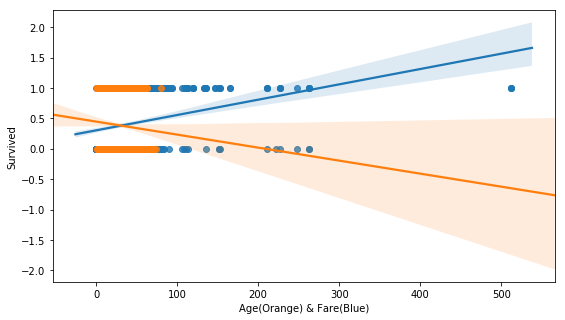

In [28]:
# lets check a couple of scatter plots
plt.figure(figsize=(9,5))
sns.regplot(data.Fare, data.Survived)
sns.regplot(data.Age, data.Survived)
plt.gca().set_xlabel('Age(Orange) & Fare(Blue)');

It seems that the older you are the less likely you are to survive. And the higher the fare, the more likely someone will survive

In [29]:
# lets split age & fare into bins and dummify them 
pd.cut(data.Age, 5).value_counts()

(16.136, 32.102]    748
(32.102, 48.068]    308
(0.0902, 16.136]    134
(48.068, 64.034]    106
(64.034, 80.0]       13
Name: Age, dtype: int64

In [30]:
pd.qcut(data.Fare, 4).value_counts()

(-0.001, 7.896]      337
(14.454, 31.275]     328
(31.275, 512.329]    323
(7.896, 14.454]      321
Name: Fare, dtype: int64

In [31]:
data.Age = data.Age.apply(lambda x: 0 if x <= 16 else 1 if x <= 32 else 2 if x <= 48 else 3 if x <= 64 else 4)

In [32]:
data.Fare = data.Fare.apply(lambda x: 0 if x <= 7.9 else 1 if x <= 14.5 else 2 if x <= 31.3 else 3)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 19 columns):
Survived          891 non-null float64
Sex               1309 non-null int64
Age               1309 non-null int64
Fare              1309 non-null int64
WithCabin         1309 non-null int64
TotalFamily       1309 non-null int64
isAlone           1309 non-null int64
NameLength        1309 non-null int64
Embarked_isC      1309 non-null uint8
Embarked_isQ      1309 non-null uint8
Embarked_isS      1309 non-null uint8
Title_isMaster    1309 non-null uint8
Title_isMiss      1309 non-null uint8
Title_isMr        1309 non-null uint8
Title_isMrs       1309 non-null uint8
Title_isOther     1309 non-null uint8
Pclass_is1        1309 non-null uint8
Pclass_is2        1309 non-null uint8
Pclass_is3        1309 non-null uint8
dtypes: float64(1), int64(7), uint8(11)
memory usage: 106.1 KB


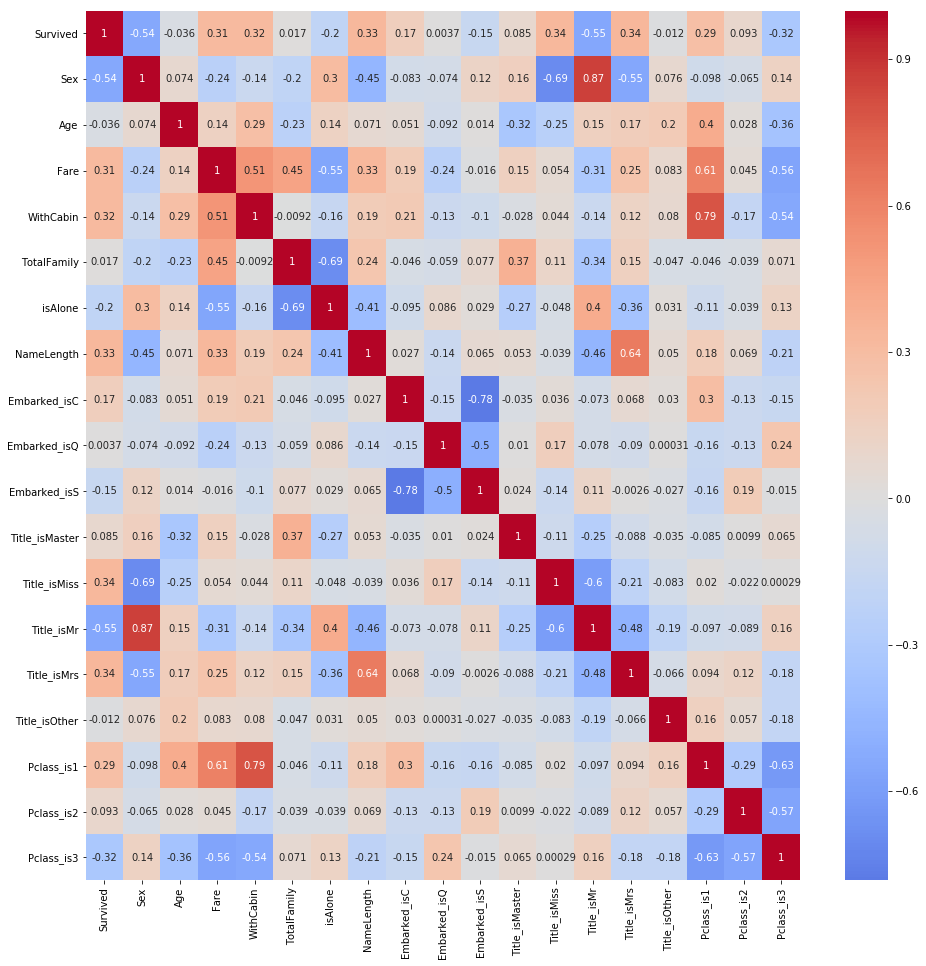

In [34]:
plt.figure(figsize=(16,16))
sns.heatmap(data[data.Survived.notnull()].corr(), center=0, cmap='coolwarm', annot=True);

Time to split data back into train and test and do modeling

In [35]:
y = data.Survived[data.Survived.notna()]
X = data.drop('Survived', axis=1)
X_train = X[data.Survived.notna()]
X_test = X[data.Survived.isnull()]
X_train.shape, X_test.shape, y.shape

((891, 18), (418, 18), (891,))

In [85]:
# modeling imports for KNN, LogReg, RandomForest, adaboost, SVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline

In [37]:
# create scaled X
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\TQ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [68]:
# creata a pipeline for each model to be used in gridsearchCV
cv = StratifiedKFold(n_splits=10, shuffle=True)
scaler = StandardScaler()
knn = KNeighborsClassifier()
knn_pipeline = Pipeline([('transformer', scaler), ('estimator', knn)])

knn_params = {'estimator__n_neighbors': [1,3,5,7,9,11,13,15,21], 'estimator__weights':['uniform', 'distance'],
             'estimator__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_grid = GridSearchCV(knn_pipeline, knn_params, n_jobs=-1, cv=cv, verbose=2)
knn_grid.fit(X_train, y);

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   23.4s finished
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [69]:
knn_grid.best_score_, knn_grid.best_params_

(0.8215488215488216,
 {'estimator__algorithm': 'auto',
  'estimator__n_neighbors': 5,
  'estimator__weights': 'uniform'})

In [70]:
cv = StratifiedKFold(n_splits=10, shuffle=True)
scaler = StandardScaler()
logreg = LogisticRegression()
log_pipeline = Pipeline([('transformer', scaler), ('estimator', logreg)])

log_params = {'estimator__penalty': ['l1', 'l2'],
              'estimator__C':[.00001, .0001, .001, .005, .01, .025, .05, .075, .1, .25, .5, .75, 1, 1.5, 2, 5]}

log_grid = GridSearchCV(log_pipeline, log_params, n_jobs=-1, cv=cv, verbose=2)
log_grid.fit(X_train, y);

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    5.6s finished
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
log_grid.best_score_, log_grid.best_params_

(0.8361391694725028, {'estimator__C': 0.025, 'estimator__penalty': 'l2'})

In [54]:
cv = StratifiedKFold(n_splits=10, shuffle=True)
scaler = StandardScaler()
forest = RandomForestClassifier()
forest_pipeline = Pipeline([('transformer', scaler), ('estimator', forest)])

forest_params = {'estimator__n_estimators': [50, 150, 1000, 2000],
              'estimator__max_depth':[2, 3, 5, 7, 9, 11, 18],
                'estimator__max_features':[2, 3, 5, 7, 9, 11]}

forest_grid = GridSearchCV(forest_pipeline, forest_params, n_jobs=-1, cv=cv, verbose=2)
forest_grid.fit(X_train, y);

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed: 47.1min finished
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [55]:
forest_grid.best_score_, forest_grid.best_params_

(0.8383838383838383,
 {'estimator__max_depth': 5,
  'estimator__max_features': 7,
  'estimator__n_estimators': 2000})

In [58]:
cv = StratifiedKFold(n_splits=10, shuffle=True)
scaler = StandardScaler()
ada = AdaBoostClassifier()
ada_pipeline = Pipeline([('transformer', scaler), ('estimator', ada)])

ada_params = {'estimator__base_estimator': [None, DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
              'estimator__n_estimators': [150, 300, 1500],
              'estimator__learning_rate':[.01, .1, .5, 1, 2]}

ada_grid = GridSearchCV(ada_pipeline, ada_params, n_jobs=-1, cv=cv, verbose=2)
ada_grid.fit(X_train, y);

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 10.6min finished
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by St

In [60]:
ada_grid.best_score_, ada_grid.best_params_

(0.8305274971941639,
 {'estimator__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'),
  'estimator__learning_rate': 0.01,
  'estimator__n_estimators': 300})

In [72]:
cv = StratifiedKFold(n_splits=10, shuffle=True)
scaler = StandardScaler()
svc = SVC()
svc_pipeline = Pipeline([('transformer', scaler), ('estimator', svc)])

svc_params = {'estimator__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'estimator__C':[.0001,.001,.005,.01,.05,.1,.25, .5, .75, 1,5,10,15,20]}


svc_grid = GridSearchCV(svc_pipeline, svc_params, n_jobs=-1, cv=cv, verbose=2)
svc_grid.fit(X_train, y);

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:   33.0s finished
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [73]:
svc_grid.best_score_, svc_grid.best_params_

(0.8338945005611672, {'estimator__C': 0.1, 'estimator__kernel': 'poly'})

In [74]:
# save each model
best_knn = knn_grid.best_estimator_
best_log = log_grid.best_estimator_
best_forest = forest_grid.best_estimator_
best_ada = ada_grid.best_estimator_
best_svc = svc_grid.best_estimator_

In [82]:
# we'll try stacking, lets create a df with predictions from each model as a feature
metadf = pd.DataFrame({'knn':best_knn.predict(X), 'logreg':best_log.predict(X), 'random_forest':best_forest.predict(X),
              'adaboost':best_ada.predict(X), 'svc':best_svc.predict(X), 'survived':y}, index=X.index)

C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform

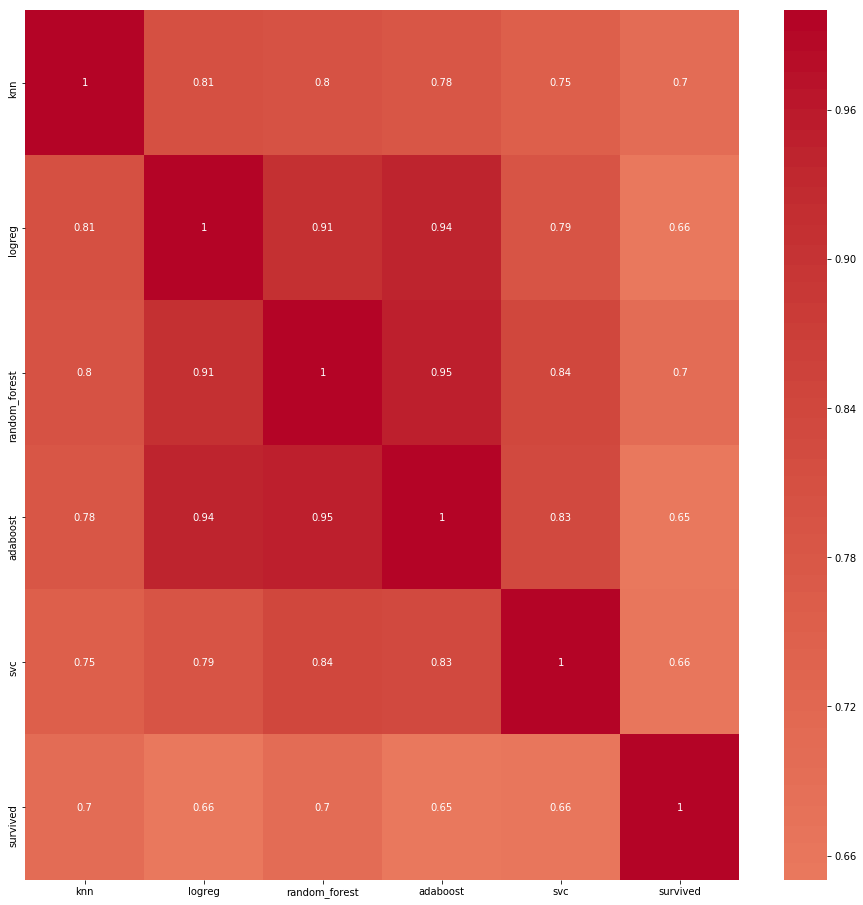

In [86]:
# lets check model correlation
plt.figure(figsize=(16,16))
sns.heatmap(metadf[metadf.survived.notna()].corr(), center=0, cmap='coolwarm', annot=True);

In [84]:
metaX_train = metadf[metadf.survived.notna()].drop('survived', axis=1)
metaX_test = metadf[metadf.survived.isnull()].drop('survived', axis=1)
metaX_train.shape, metaX_test.shape

((891, 5), (418, 5))

In [87]:
# lets try bagging as a metamodel
cv = StratifiedKFold(n_splits=10, shuffle=True)

bag_params = {'n_estimators': [5000], 'base_estimator':[None, KNeighborsClassifier(n_neighbors=7), SVC(), SVC(kernel='linear'),
                                                        LogisticRegression(), LogisticRegression('l1')]}

bag_grid = GridSearchCV(BaggingClassifier(), bag_params, n_jobs=-1, cv=cv, verbose=2)
bag_grid.fit(metaX_train, y);

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 28.4min finished


In [88]:
bag_grid.best_score_, bag_grid.best_params_

(0.8597081930415263,
 {'base_estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), 'n_estimators': 5000})

In [89]:
best_bag = bag_grid.best_estimator_

In [98]:
# lets export our results and score it on kaggle
knn_scoredf = pd.DataFrame({'PassengerId':X_test.index, 'Survived':best_knn.predict(X_test).astype(int)})
logreg_scoredf = pd.DataFrame({'PassengerId':X_test.index, 'Survived':best_log.predict(X_test).astype(int)})
forest_scoredf = pd.DataFrame({'PassengerId':X_test.index, 'Survived':best_forest.predict(X_test).astype(int)})
ada_scoredf = pd.DataFrame({'PassengerId':X_test.index, 'Survived':best_ada.predict(X_test).astype(int)})
svc_scoredf = pd.DataFrame({'PassengerId':X_test.index, 'Survived':best_svc.predict(X_test).astype(int)})
stack_bag_scoredf = pd.DataFrame({'PassengerId':X_test.index, 'Survived':best_bag.predict(metaX_test).astype(int)})

C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\TQ\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform

In [99]:
knn_scoredf.to_csv('knn_score.csv', index=False)
logreg_scoredf.to_csv('log_score.csv', index=False)
forest_scoredf.to_csv('forest_score.csv', index=False)
ada_scoredf.to_csv('ada_score.csv', index=False)
svc_scoredf.to_csv('svc_score.csv', index=False)
stack_bag_scoredf.to_csv('stackedbag_score.csv', index=False)